# Chapter 2 Fourier and Wavelet Transforms
## Buffett Group Meeting October 1, 2020:
### _How in the world is it October?_

## 2.1 Fourier series and Fourier transforms

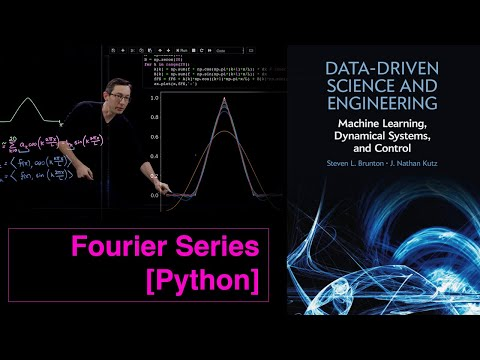

In [11]:
# Fourier Series [Python]
from IPython.display import YouTubeVideo
YouTubeVideo('dZrShAGqT44', width="1000", height="500")

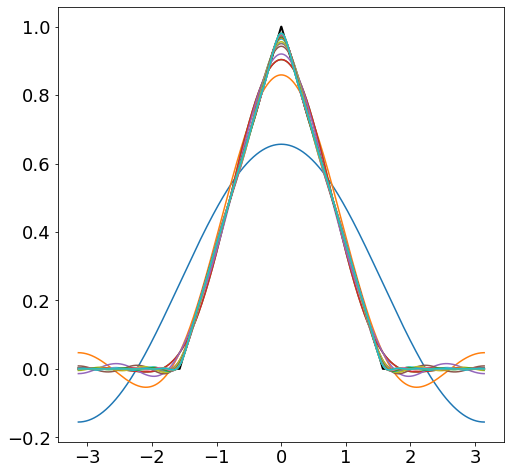

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

# Define domain
dx = 0.001
L = np.pi
x = L * np.arange(-1+dx,1+dx,dx)
n = len(x)
nquart = int(np.floor(n/4))

# Define hat function
f = np.zeros_like(x)
f[nquart:2*nquart] = (4/n)*np.arange(1,nquart+1)
f[2*nquart:3*nquart] = np.ones(nquart) - (4/n)*np.arange(0,nquart)

# set up figure
fig, ax = plt.subplots()
ax.plot(x,f,'-',color='k',LineWidth=2)
name = "Accent"
cmap = get_cmap('tab10')
colors = cmap.colors
ax.set_prop_cycle(color=colors)

# initialize arrays before loops
A0 = np.sum(f * np.ones_like(x)) * dx
fFS = A0/2
A = np.zeros(20)
B = np.zeros(20)

# Compute Fourier series and plot
for k in range(20):
    A[k] = np.sum(f * np.cos(np.pi*(k+1)*x/L)) * dx # Inner product
    B[k] = np.sum(f * np.sin(np.pi*(k+1)*x/L)) * dx
    fFS = fFS + A[k]*np.cos((k+1)*np.pi*x/L) + B[k]*np.sin((k+1)*np.pi*x/L)
    ax.plot(x,fFS,'-')

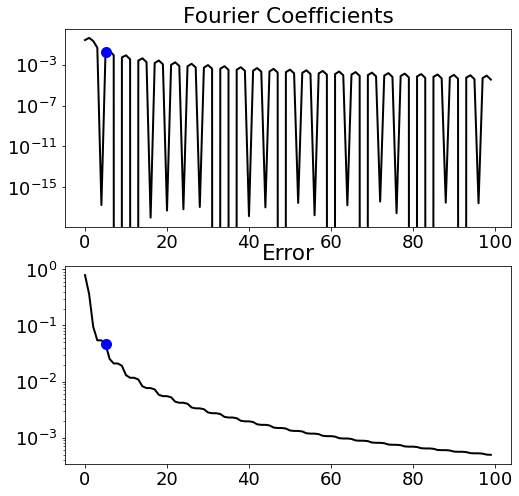

In [13]:
## Plot amplitudes

fFS = (A0/2) * np.ones_like(f)
kmax = 100
A = np.zeros(kmax)
B = np.zeros(kmax)
ERR = np.zeros(kmax)

A[0] = A0/2
ERR[0] = np.linalg.norm(f-fFS)/np.linalg.norm(f)

for k in range(1,kmax):
    A[k] = np.sum(f * np.cos(np.pi*k*x/L)) * dx
    B[k] = np.sum(f * np.sin(np.pi*k*x/L)) * dx
    fFS = fFS + A[k] * np.cos(k*np.pi*x/L) + B[k] * np.sin(k*np.pi*x/L)
    ERR[k] = np.linalg.norm(f-fFS)/np.linalg.norm(f)
    
thresh = np.median(ERR) * np.sqrt(kmax) * (4/np.sqrt(3))
r = np.max(np.where(ERR > thresh))

fig, axs = plt.subplots(2,1)
axs[0].semilogy(np.arange(kmax),A,color='k',LineWidth=2)
axs[0].semilogy(r,A[r],'o',color='b',MarkerSize=10)
plt.sca(axs[0])
plt.title('Fourier Coefficients')

axs[1].semilogy(np.arange(kmax),ERR,color='k',LineWidth=2)
axs[1].semilogy(r,ERR[r],'o',color='b',MarkerSize=10)
plt.sca(axs[1])
plt.title('Error')

plt.show()

Gibbs phenomena i.e. high frequency oscillations at discontinuities, artifact due to truncation

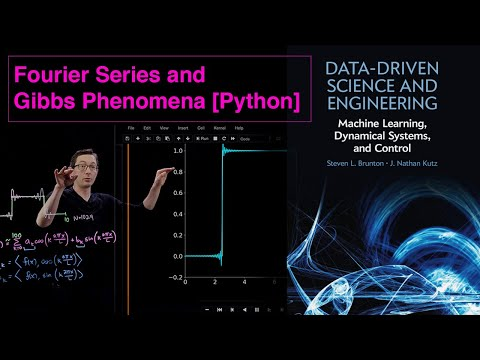

In [14]:
YouTubeVideo('sSvj1nCC6_o', width="1000", height="500")

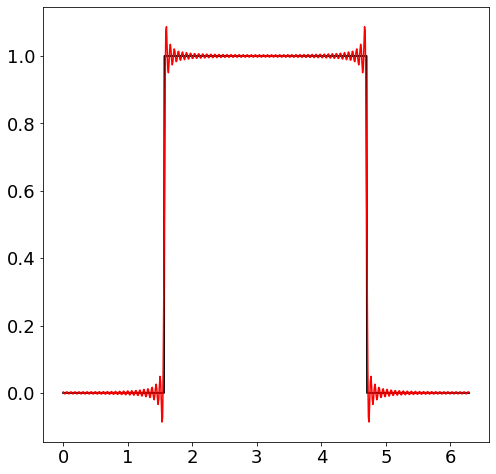

In [52]:
dx = 0.01
L = 2*np.pi
x = np.arange(0,L+dx,dx)
n = len(x)
nquart = int(np.floor(n/4))

f = np.zeros_like(x)
f[nquart:3*nquart] = 1

A0 = np.sum(f * np.ones_like(x)) * dx * 2 / L
fFS = A0/2 * np.ones_like(f)

for k in range(1,101):
    Ak = np.sum(f * np.cos(2*np.pi*k*x/L)) * dx * 2 / L
    Bk = np.sum(f * np.sin(2*np.pi*k*x/L)) * dx * 2 / L
    fFS = fFS + Ak*np.cos(2*k*np.pi*x/L) + Bk*np.sin(2*k*np.pi*x/L)
    
plt.plot(x,f,color='k',LineWidth=2)
plt.plot(x,fFS,'-',color='r',LineWidth=1.5)
plt.show()

## 2.2 Discrete Fourier transform (DFT) and fast Fourier transform (FFT)

Discrete Fourier transform. This is how to compute the definition of the DFT, but you'd never use this to actually do a Fourier transform, you would use the FFT.

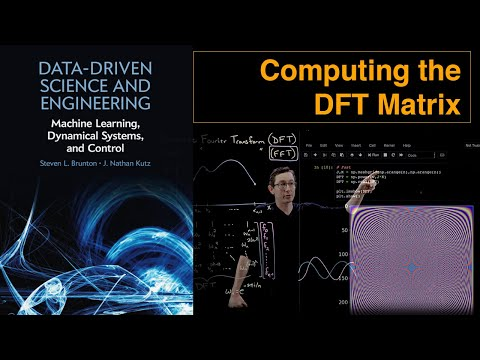

In [53]:
# This video does matlab then python
YouTubeVideo('Xw4voABxU5c', width="1000", height="500")

In [16]:
n = 256
w = np.exp(-1j * 2 * np.pi / n)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  


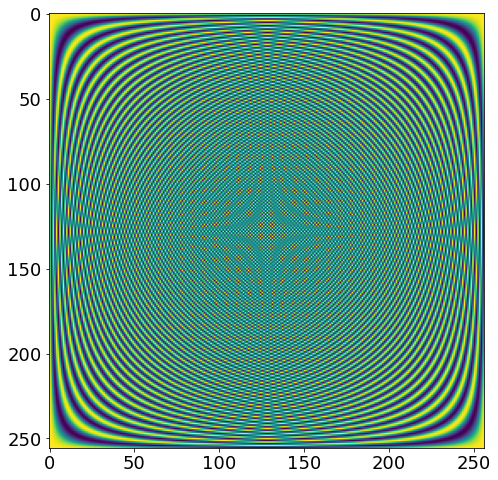

In [17]:
DFT = np.zeros((n,n))

# Slow because two big loops
for i in range(n):
    for k in range(n):
        DFT[i,k] = w**(i*k)
        
DFT = np.real(DFT)
        
plt.imshow(DFT, cmap='jet')
plt.show()

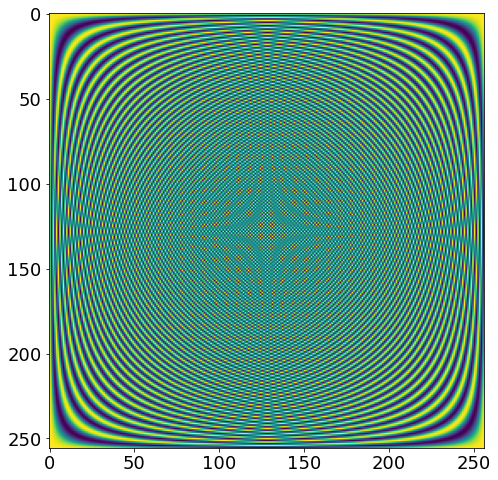

In [18]:
# Fast because matrix form
J,K = np.meshgrid(np.arange(n),np.arange(n))
DFT = np.power(w,J*K)
DFT = np.real(DFT)
       
plt.imshow(DFT, cmap='jet')
plt.show()

Steve does such a clear job of explaining the FFT! Gauss invented the FFT as a mental math trick for himself and didn't think it was important enough to publish! 👻

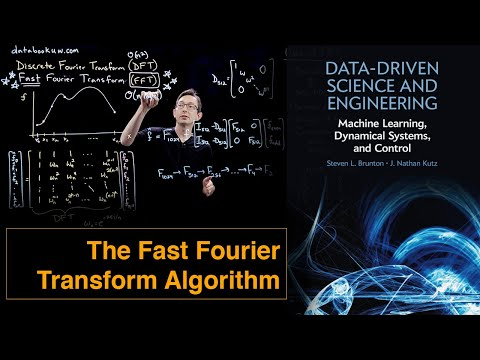

In [55]:
YouTubeVideo('toj_IoCQE-4', width="1000", height="500")

FFT: Noise filtering

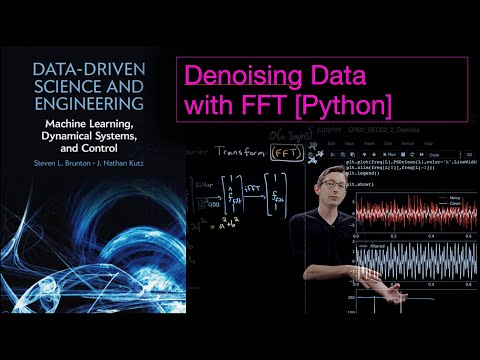

In [19]:
YouTubeVideo('s2K1JfNR7Sc', width="1000", height="500")

In [60]:
# Create a simple signal with two frequencies
dt = 0.001
t = np.arange(0,1,dt)
f = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t) # Sum of 2 frequencies 50Hz and 120Hz
f_clean = f
f = f + 2.5*np.random.randn(len(t))              # Add some noise

In [61]:
## Compute the Fast Fourier Transform (FFT)

n = len(t)
fhat = np.fft.fft(f,n)                     # Compute the FFT
PSD = fhat * np.conj(fhat) / n             # Power spectrum (power per freq)   This is the important bit of this example
freq = (1/(dt*n)) * np.arange(n)           # Create x-axis of frequencies in Hz
L = np.arange(1,np.floor(n/2),dtype='int') # Only plot the first half of freqs


In [62]:
## Use the PSD to filter out noise
indices = PSD > 100       # Find all freqs with large power
PSDclean = PSD * indices  # Zero out all others
fhat = indices * fhat     # Zero out small Fourier coeffs. in Y
ffilt = np.fft.ifft(fhat) # Inverse FFT for filtered time signal

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


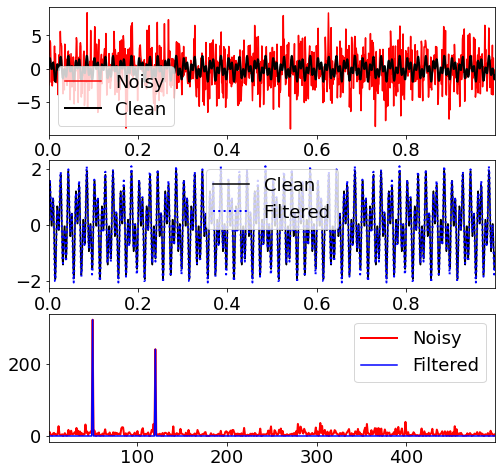

In [65]:
## Plots
fig,axs = plt.subplots(3,1)

plt.sca(axs[0])
plt.plot(t,f,color='r',LineWidth=1.5,label='Noisy')
plt.plot(t,f_clean,color='k',LineWidth=2,label='Clean')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(t,f_clean,color='k',LineWidth=1.5,label='Clean')
plt.plot(t,ffilt,':',color='b',LineWidth=2,label='Filtered')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[2])
plt.plot(freq[L],PSD[L],color='r',LineWidth=2,label='Noisy')
plt.plot(freq[L],PSDclean[L],color='b',LineWidth=1.5,label='Filtered')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()

plt.show()

FFT: Spectral derivatives

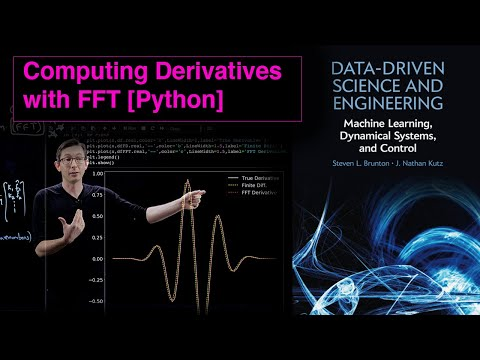

In [24]:
YouTubeVideo('y8SqkjoKV4k', width="1000", height="500")

In [66]:
n = 64
L = 30
dx = L/n
x = np.arange(-L/2,L/2,dx,dtype='complex_') 
f = np.cos(x) * np.exp(-np.power(x,2)/25) # Function
df = -(np.sin(x) * np.exp(-np.power(x,2)/25) + (2/25)*x*f) # Analytic Derivative, found by chain rule

In [67]:
## Approximate derivative using finite difference
dfFD = np.zeros(len(df),dtype='complex_')
for kappa in range(len(df)-1):
    dfFD[kappa] = (f[kappa+1]-f[kappa])/dx # order dx error
    
dfFD[-1] = dfFD[-2]

In [68]:
## Derivative using FFT (spectral derivative)
fhat = np.fft.fft(f) #fft
kappa = (2*np.pi/L)*np.arange(-n/2,n/2) # vector of frequencies
kappa = np.fft.fftshift(kappa) # Re-order fft frequencies -- mysterious to me still
dfhat = kappa * fhat * (1j) # derivative in wave space
dfFFT = np.real(np.fft.ifft(dfhat)) #ifft for space space

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


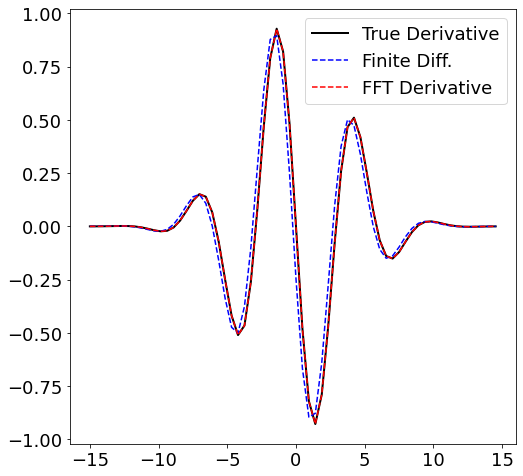

In [69]:
## Plots
plt.plot(x,df.real,color='k',LineWidth=2,label='True Derivative')
plt.plot(x,dfFD.real,'--',color='b',LineWidth=1.5,label='Finite Diff.')
plt.plot(x,dfFFT.real,'--',color='r',LineWidth=1.5,label='FFT Derivative')
plt.legend()
plt.show()

We could wrap this example in a for loop over increasing n and see that the spectral derivative gains accuracy faster than finite differences.

## 2.3 Transforming partial differential equations

Heat equation. U is temperature U(x,t), x is space and t is time. Fourier transform space to wavenumbers. Fourier transform let's you convert PDEs to n decoupled ODEs one for each wavenumber.

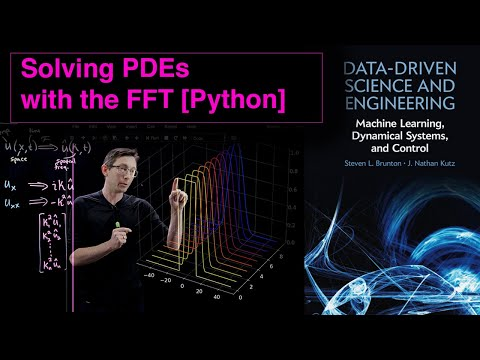

In [29]:
YouTubeVideo('hDeARtZdq-U', width="1000", height="500")

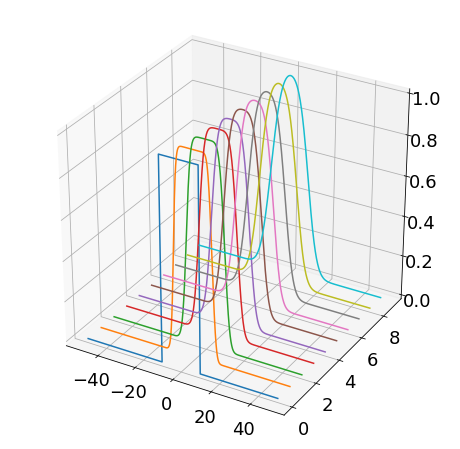

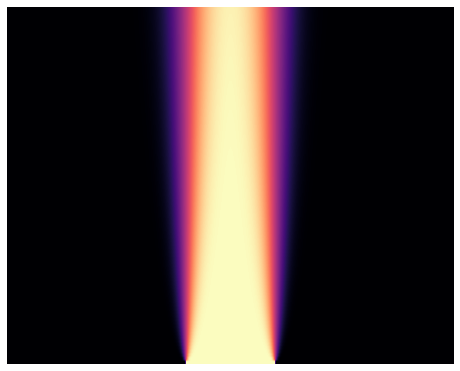

In [70]:
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import axes3d

# Define domain
a = 1    # Thermal diffusivity constant
L = 100  # Length of domain
N = 1000 # Number of discretization points
dx = L/N
x = np.arange(-L/2,L/2,dx) # Define x domain

# Define discrete wavenumbers
kappa = 2*np.pi*np.fft.fftfreq(N, d=dx)

# Initial condition - top hat
u0 = np.zeros_like(x)
u0[int((L/2 - L/10)/dx):int((L/2 + L/10)/dx)] = 1
u0hat = np.fft.fft(u0) # fft initial condition

# SciPy's odeint function doesn't play well with complex numbers, so we recast 
# the state u0hat from an N-element complex vector to a 2N-element real vector
u0hat_ri = np.concatenate((u0hat.real,u0hat.imag))

# Simulate in Fourier frequency domain
dt = 0.1
t = np.arange(0,10,dt)

def rhsHeat(uhat_ri,t,kappa,a): #-alpha^2 kappa^2 uhat
    uhat = uhat_ri[:N] + (1j) * uhat_ri[N:]
    d_uhat = -a**2 * (np.power(kappa,2)) * uhat # Uxx 
    d_uhat_ri = np.concatenate((d_uhat.real,d_uhat.imag)).astype('float64')
    return d_uhat_ri

uhat_ri = odeint(rhsHeat, u0hat_ri, t, args=(kappa,a)) # ode integrater this is the guts

uhat = uhat_ri[:,:N] + (1j) * uhat_ri[:,N:]

u = np.zeros_like(uhat)

for k in range(len(t)):
    u[k,:] = np.fft.ifft(uhat[k,:]) # ifft back to space space 

u = u.real    

# Waterfall plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

u_plot = u[0:-1:10,:]
for j in range(u_plot.shape[0]):
    ys = j*np.ones(u_plot.shape[1])
    ax.plot(x,ys,u_plot[j,:])
    
# Image plot
plt.figure()
plt.imshow(np.flipud(u), aspect=8, cmap='magma')
plt.axis('off')
plt.show()

Shape corners decay fast because they have the higher frequency wavenumber so smaller spacial scale and faster decay.

One-way wave equation. u_t + cu_x = 0 --> uhat_t = -cik uhat. Traveling wave, constant wave speed, no diffusion.

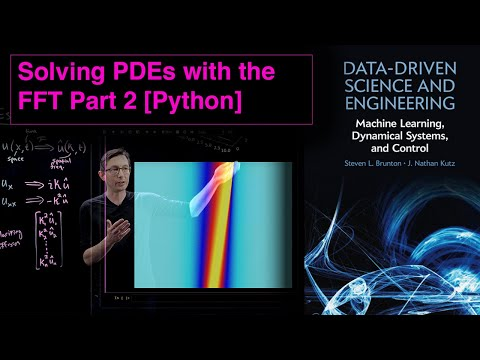

In [31]:
YouTubeVideo('mMdIxa5qC9Y', width="1000", height="500")

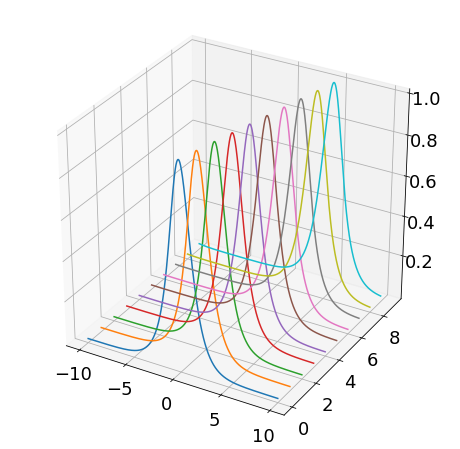

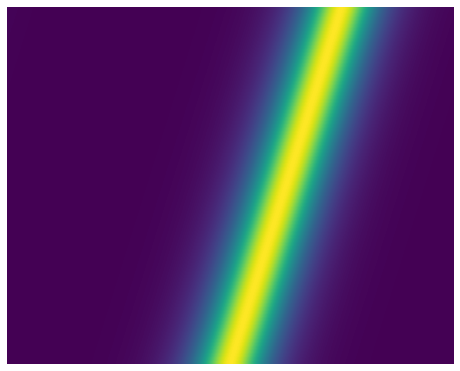

In [32]:
# set up domain
c = 2    # Wave speed
L = 20   # Length of domain
N = 1000 # Number of discretization points
dx = L/N
x = np.arange(-L/2,L/2,dx) # Define x domain

# Define discrete wavenumbers
kappa = 2*np.pi*np.fft.fftfreq(N, d=dx)

# Initial condition (gaussian wave)
u0 = 1/np.cosh(x)
u0hat = np.fft.fft(u0)

# SciPy's odeint function doesn't play well with complex numbers, so we recast 
# the state u0hat from an N-element complex vector to a 2N-element real vector
u0hat_ri = np.concatenate((u0hat.real,u0hat.imag))

# Simulate in Fourier frequency domain
dt = 0.025
t = np.arange(0,100*dt,dt)

#set up right hand side of equation
def rhsWave(uhat_ri,t,kappa,c):
    uhat = uhat_ri[:N] + (1j) * uhat_ri[N:]
    d_uhat = -c*(1j)*kappa*uhat
    d_uhat_ri = np.concatenate((d_uhat.real,d_uhat.imag)).astype('float64')
    return d_uhat_ri

# solve the right hand side
uhat_ri = odeint(rhsWave, u0hat_ri, t, args=(kappa,c))  
uhat = uhat_ri[:,:N] + (1j) * uhat_ri[:,N:]

# Alternatively, simulate in spatial domain - good for nonlinear systems!
def rhsWaveSpatial(u,t,kappa,c):
    uhat = np.fft.fft(u) # still use fft to take derivatives
    d_uhat = (1j)*kappa*uhat
    d_u = np.fft.ifft(d_uhat).real # less efficient because you have to fft and ifft at each time step
    du_dt = -c*d_u
    return du_dt

u = odeint(rhsWaveSpatial,u0,t,args=(kappa,c))

# Inverse FFT to bring back to spatial domain
u = np.zeros_like(uhat)

for k in range(len(t)):
    u[k,:] = np.fft.ifft(uhat[k,:])

u = u.real   


# Waterfall plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

u_plot = u[0:-1:10,:]
for j in range(u_plot.shape[0]):
    ys = j*np.ones(u_plot.shape[1])
    ax.plot(x,ys,u_plot[j,:])
    
# Image plot
plt.figure()
plt.imshow(np.flipud(u), aspect=8)
plt.axis('off')
plt.show()

Burgers' equation. 1D navier stokes. Wave speed is set by wave height, without diffusion steepens with time --> shock wave. u_t + uu_x = nu u_xx

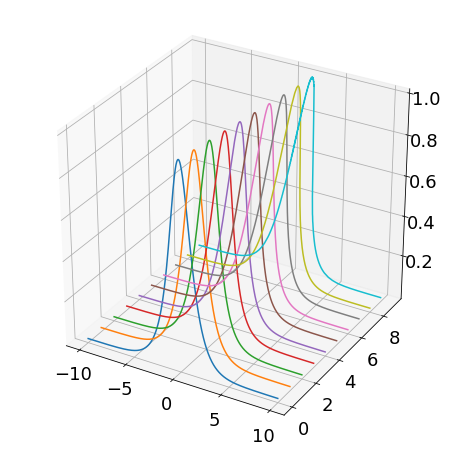

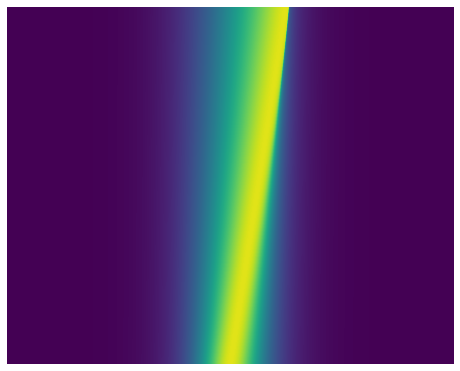

In [33]:
nu = 0.001 # Diffusion constant
L = 20     # Length of domain
N = 1000   # Number of discretization points
dx = L/N
x = np.arange(-L/2,L/2,dx) # Define x domain

# Define discrete wavenumbers
kappa = 2*np.pi*np.fft.fftfreq(N, d=dx)

# Initial condition
u0 = 1/np.cosh(x)

# Simulate PDE in spatial domain
dt = 0.025
t = np.arange(0,100*dt,dt)

# this is the important part!
def rhsBurgers(u,t,kappa,nu):
    uhat = np.fft.fft(u)
    d_uhat = (1j)*kappa*uhat # fft to compute first deriv
    dd_uhat = -np.power(kappa,2)*uhat #  fft to compute second deriv
    d_u = np.fft.ifft(d_uhat) # ifft back to space
    dd_u = np.fft.ifft(dd_uhat)
    du_dt = -u * d_u + nu*dd_u # right hand side of the equation
    return du_dt.real

u = odeint(rhsBurgers,u0,t,args=(kappa,nu)) # integrate time

# Waterfall plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

u_plot = u[0:-1:10,:]
for j in range(u_plot.shape[0]):
    ys = j*np.ones(u_plot.shape[1])
    ax.plot(x,ys,u_plot[j,:])
    
# Image plot
plt.figure()
plt.imshow(np.flipud(u), aspect=8)
plt.axis('off')
plt.show()

## 2.4 Gabor transform and the spectrogram

Time domain you know when tones happen but not their frequency, and in frequency domain you what what tones are played but not when. Gabor transform let's you have both! Spectrogram, time frequency plot. Better for signals that are not perfectly periodic in time. Gaussian window convolved with fourier transform to weight it in time. PSDs for sliding window of time. Trade off between resolution in frequency and time. 

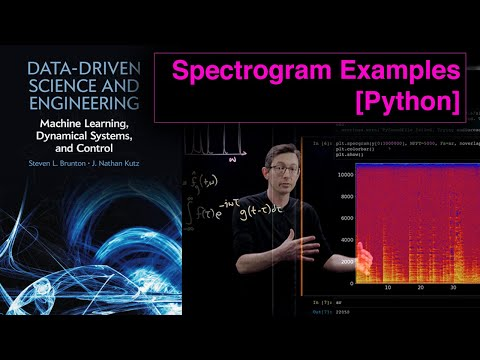

In [34]:
YouTubeVideo('TJGlxdW7Fb4', width="1000", height="500")

Quadratic chirp signal

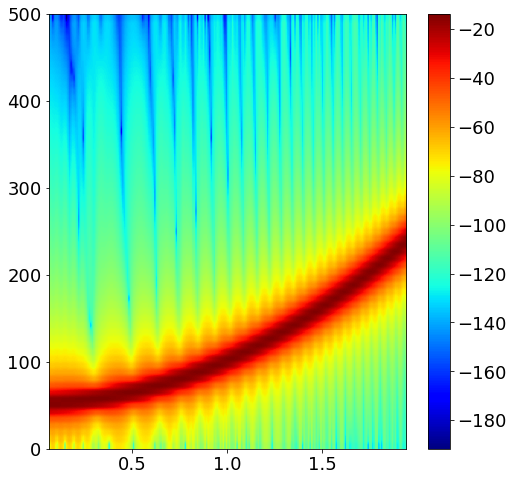

In [75]:
dt = 0.001
t = np.arange(0,2,dt)
f0 = 50
f1 = 250
t1 = 2
x = np.cos(2*np.pi*t*(f0 + (f1-f0)*np.power(t,2)/(3*t1**2)))

plt.specgram(x, NFFT=128, Fs=1/dt, noverlap=120,cmap='jet')
plt.colorbar()
plt.show()

In [74]:
plt.specgram?

Signature:
plt.specgram(
    x,
    NFFT=None,
    Fs=None,
    Fc=None,
    detrend=None,
    window=None,
    noverlap=None,
    cmap=None,
    xextent=None,
    pad_to=None,
    sides=None,
    scale_by_freq=None,
    mode=None,
    scale=None,
    vmin=None,
    vmax=None,
    *,
    data=None,
    **kwargs,
)
Docstring:
Plot a spectrogram.

Compute and plot a spectrogram of data in *x*.  Data are split into
*NFFT* length segments and the spectrum of each section is
computed.  The windowing function *window* is applied to each
segment, and the amount of overlap of each segment is
specified with *noverlap*. The spectrogram is plotted as a colormap
(using imshow).

Parameters
----------
x : 1-D array or sequence
    Array or sequence containing the data.

Fs : scalar
    The sampling frequency (samples per time unit).  It is used
    to calculate the Fourier frequencies, freqs, in cycles per time
    unit. The default value is 2.

window : callable or ndarray
    A function or a vect

Steve loves the spectrogram. Suggests taking the SVD of the spectrogram to find eigen chords.

## 2.5 Wavelets and multi-resolution analysis

More orthogonal functions instead of cosines and sines. Enhanced spectrogram with resolution as a function of frequency. Great for image compression. Haar wavelet example. Mother wavelet is step function from +1 to -1. Other examples: Daubechies, Mexican Hat, Coiflet, ... tuned to the dataset depending on edges etc.

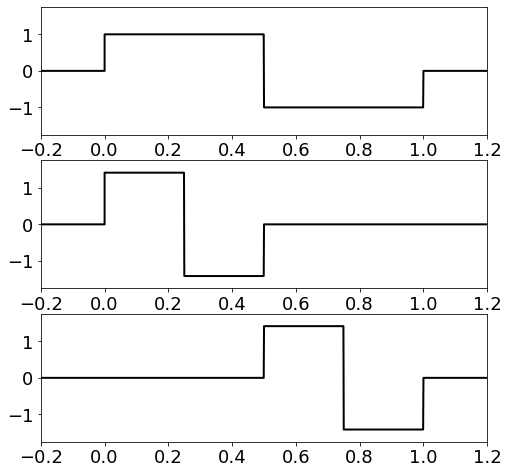

In [36]:
x = np.arange(0,1,0.001)
n = len(x)
n2 = int(np.floor(n/2))
n4 = int(np.floor(n/4))

f10 = np.zeros_like(x)
f10[:n2] = 1
f10[n2:] = -1

f21 = np.zeros_like(x)
f21[:n4] = 1
f21[n4:n2] = -1
f21 = f21 * np.sqrt(2)

f22 = np.zeros_like(x)
f22[n2:(n2+n4)] = 1
f22[(n2+n4):] = -1
f22 = f22 * np.sqrt(2)

# x = np.concatenate((-1, 0, x, 1, 2))
x = np.append([-1,0],x)
x = np.append(x,[1,2])

f10 = np.pad(f10, (2, 2), 'constant')
f21 = np.pad(f21, (2, 2), 'constant')
f22 = np.pad(f22, (2, 2), 'constant')

fig,axs = plt.subplots(3,1)
axs[0].plot(x,f10,color='k',LineWidth=2)
axs[0].set_xlim(-0.2,1.2)
axs[0].set_ylim(-1.75,1.75)
axs[1].plot(x,f21,color='k',LineWidth=2)
axs[1].set_xlim(-0.2,1.2)
axs[1].set_ylim(-1.75,1.75)
axs[2].plot(x,f22,color='k',LineWidth=2)
axs[2].set_xlim(-0.2,1.2)
axs[2].set_ylim(-1.75,1.75)
plt.show()

## 2.6 2D transforms and image processing

FFT2 - fft the rows and columns. Truncate the Fourier coefficients, most of which are very small (for example keep largest 1%), the ifft2 to compress image.

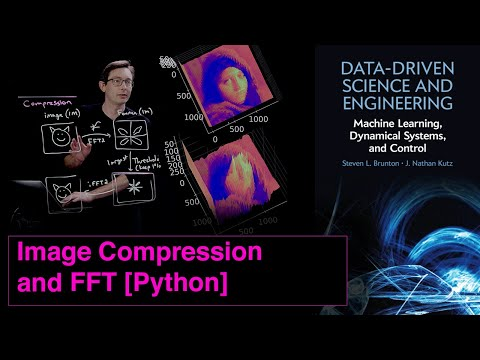

In [76]:
YouTubeVideo('uB3v6n8t2dQ', width="1000", height="500")

Compute the FFT2 (fft rows then columns).

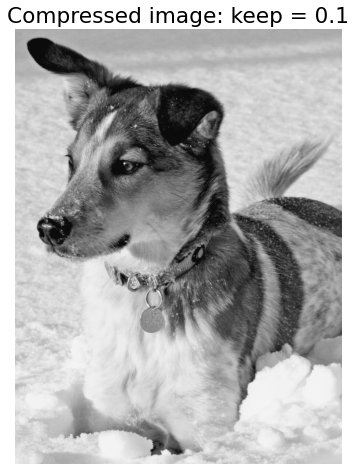

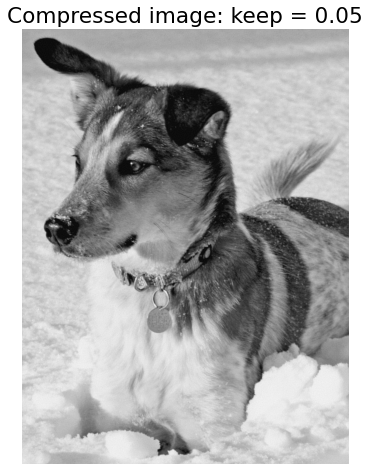

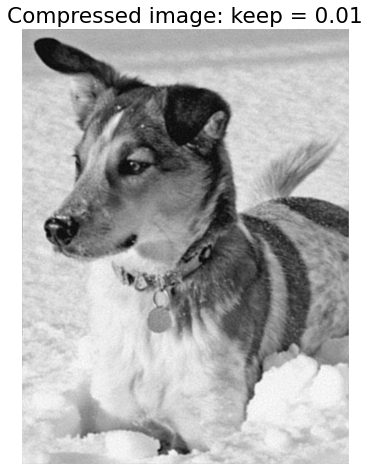

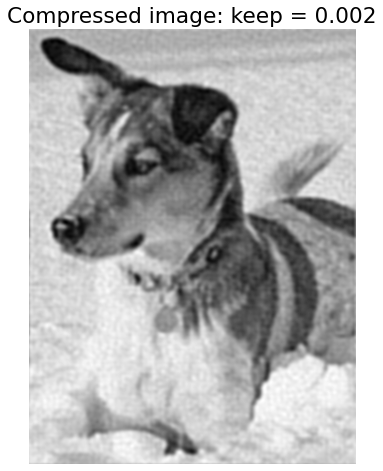

In [77]:
from matplotlib.image import imread
import os

A = imread(os.path.join('','DATA','dog.jpg'))
B = np.mean(A, -1); # Convert RGB to grayscale

Bt = np.fft.fft2(B)
Btsort = np.sort(np.abs(Bt.reshape(-1))) # sort by magnitude

# Zero out all small coefficients and inverse transform
for keep in (0.1, 0.05, 0.01, 0.002):
    thresh = Btsort[int(np.floor((1-keep)*len(Btsort)))]
    ind = np.abs(Bt)>thresh          # Find small indices
    Atlow = Bt * ind                 # Threshold small indices
    Alow = np.fft.ifft2(Atlow).real  # Compressed image
    plt.figure()
    plt.imshow(Alow,cmap='gray')
    plt.axis('off')
    plt.title('Compressed image: keep = ' + str(keep))

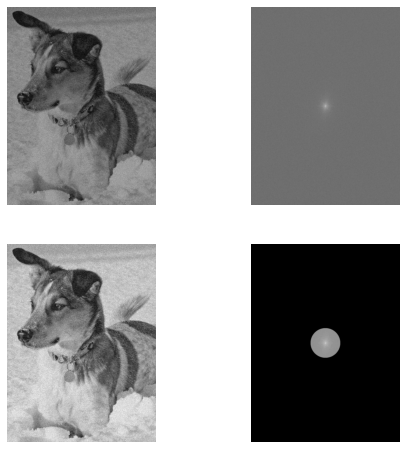

In [41]:
## Denoise
Bnoise = B + 200*np.random.randn(*B.shape).astype('uint8') # Add some noise
Bt = np.fft.fft2(Bnoise)
Btshift = np.fft.fftshift(Bt)
F = np.log(np.abs(Btshift)+1) # Put FFT on log scale

fig,axs = plt.subplots(2,2)

axs[0,0].imshow(Bnoise,cmap='gray')
axs[0,0].axis('off')

axs[0,1].imshow(F,cmap='gray')
axs[0,1].axis('off')

nx,ny = B.shape
X,Y = np.meshgrid(np.arange(-ny/2+1,ny/2+1),np.arange(-nx/2+1,nx/2+1))
# xgrid = np.fft.ifftshift(np.arange(-nx/2+1,nx/2+1))
# ygrid = np.fft.ifftshift(np.arange(-ny/2+1,ny/2+1))
# X,Y = np.meshgrid(ygrid,xgrid)
R2 = np.power(X,2) + np.power(Y,2)
ind = R2 < 150**2
Btshiftfilt = Btshift * ind
Ffilt = np.log(np.abs(Btshiftfilt)+1) # Put FFT on log scale

axs[1,1].imshow(Ffilt,cmap='gray')
axs[1,1].axis('off')

Btfilt = np.fft.ifftshift(Btshiftfilt)
Bfilt = np.fft.ifft2(Btfilt).real
axs[1,0].imshow(Bfilt,cmap='gray')
axs[1,0].axis('off')

plt.show()

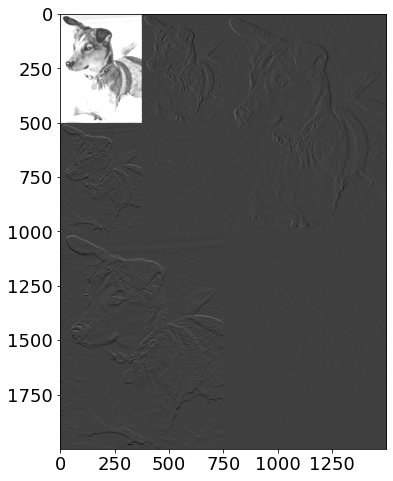

In [43]:
import pywt

## Wavelet decomposition (2 level)
n = 2
w = 'db1'
coeffs = pywt.wavedec2(B,wavelet=w,level=n)

# normalize each coefficient array
coeffs[0] /= np.abs(coeffs[0]).max()
for detail_level in range(n):
    coeffs[detail_level + 1] = [d/np.abs(d).max() for d in coeffs[detail_level + 1]]

arr, coeff_slices = pywt.coeffs_to_array(coeffs)



plt.imshow(arr,cmap='gray',vmin=-0.25,vmax=0.75)
plt.show()

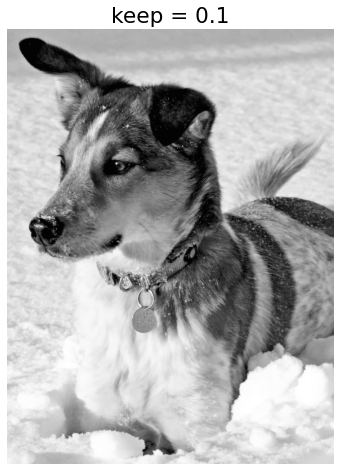

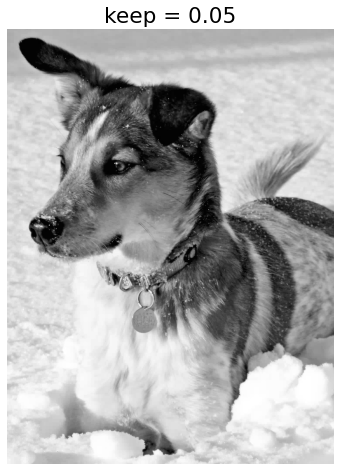

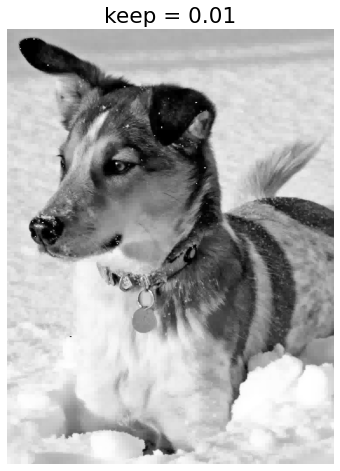

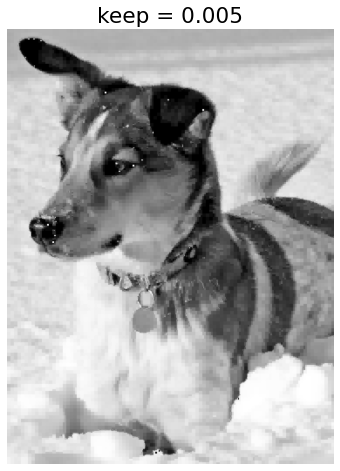

In [44]:
## Wavelet Compression
n = 4
w = 'db1'
coeffs = pywt.wavedec2(B,wavelet=w,level=n)

coeff_arr, coeff_slices = pywt.coeffs_to_array(coeffs)

Csort = np.sort(np.abs(coeff_arr.reshape(-1)))

for keep in (0.1, 0.05, 0.01, 0.005):
    thresh = Csort[int(np.floor((1-keep)*len(Csort)))]
    ind = np.abs(coeff_arr) > thresh
    Cfilt = coeff_arr * ind # Threshold small indices
    
    coeffs_filt = pywt.array_to_coeffs(Cfilt,coeff_slices,output_format='wavedec2')
    
    # Plot reconstruction
    Arecon = pywt.waverec2(coeffs_filt,wavelet=w)
    plt.figure()
    plt.imshow(Arecon.astype('uint8'),cmap='gray')
    plt.axis('off')
    plt.title('keep = ' + str(keep))


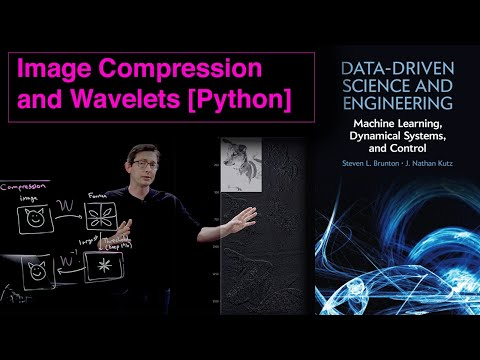

In [45]:
YouTubeVideo('eJLF9HeZA8I', width="1000", height="500")

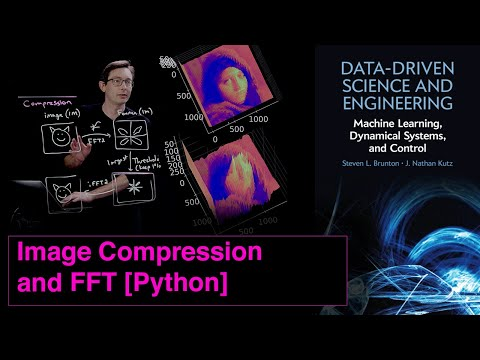